## Mineração de dados - Semana 6: 

### Exercício sobre regras de associação

Neste exercício, usaremos o algoritmo **Apriori** em uma base de dados contendo transações de compra em um supermercado.

Dados:

* Cada linha representa uma transação e cada coluna corresponde a um produto comprado. As células contém uma sequência dos produtos comprados em cada transação, caso contrário o valor é nulo.

Os dados foram obtidos do [Kaggle](https://www.kaggle.com/code/timothyabwao/market-basket-analysis-using-the-apriori-algorithm/data) e estão disponíveis neste [link](https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv).

1. Crie um novo notebook e inclua uma descrição para ele. 

2. Nesta atividade, além da bibliotecas **pandas** e **numpy**, vamos importar as bibliotecas **apyori** para usar o algoritmo apriori, e a **matplotlib** para gerar gráficos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

3. Instale e importe a biblioteca apyori

In [ ]:
!pip -qq install apyori
import apyori

4. Importando a base de dados.

  Cada objeto representa uma compra ou transação, e contém o nome de um ou mais produtos que fazem parte da compra.

In [ ]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv'
mercado = pd.read_csv(url, header=None)
mercado.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Tamanho da base de dados

In [ ]:
len(mercado)

7501

5. É preciso fazer uma limpeza nos dados, removendo espaços em branco de alguns produtos

In [ ]:
for index in mercado.columns:
    mercado[index] = mercado[index].str.strip()

6. Vamos fazer uma análise exploratória inicial vendo  os produtos existentes na base de dados. A função **melt()** permite modifica o formato original do dataframe. Nesse caso, estamos pegando os valores, excluindo os nulos e ordenando. 

In [ ]:
itens = mercado.melt()['value'].dropna().sort_values()
print(f'Existem {itens.nunique()} produtos distintos:\n', itens.unique())

Existem 119 produtos distintos:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffins'

7. Vamos verificar os itens mais vendidos

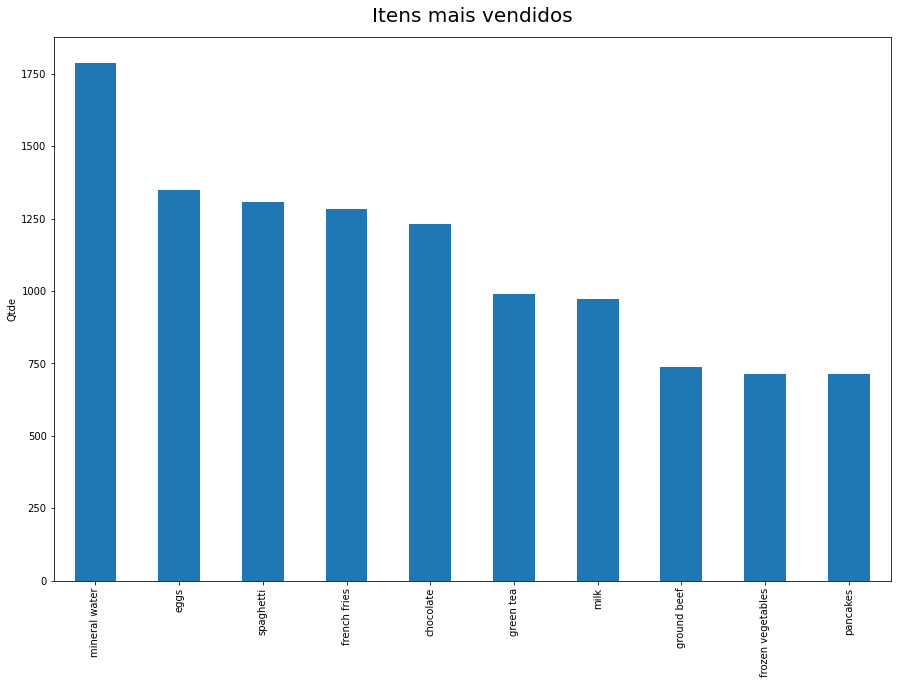

In [ ]:
qtde_itens = itens.value_counts()

barra = qtde_itens.nlargest(10).plot(kind="bar")
barra.set_title("Itens mais vendidos", size=20, weight=500, pad=15)
barra.set_ylabel("Qtde")
plt.show()

8. E também os itens menos vendidos.

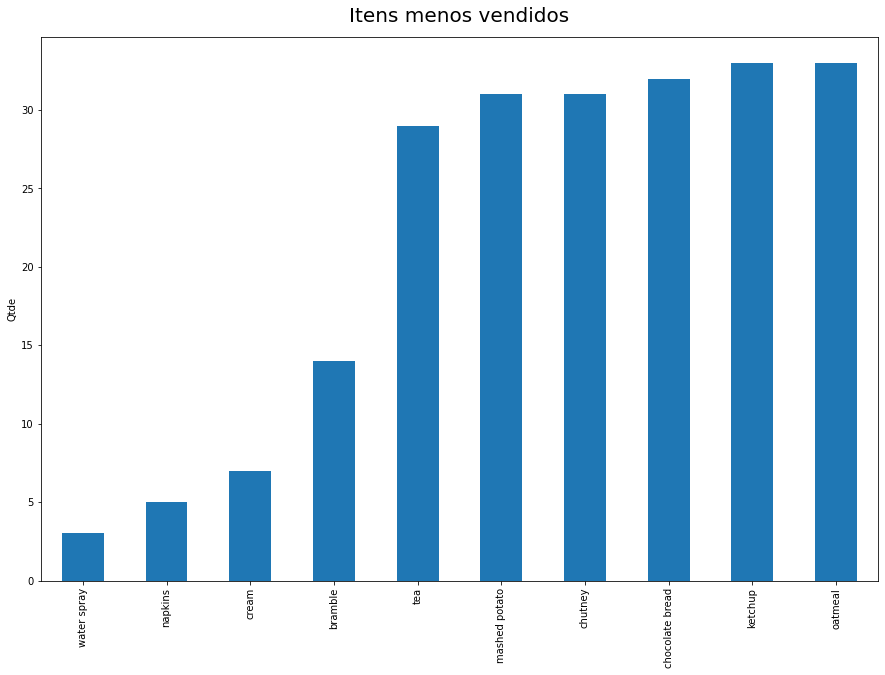

In [ ]:
barra = qtde_itens.nsmallest(10).plot(kind="bar")
barra.set_title("Itens menos vendidos", size=20, weight=500, pad=15)
barra.set_ylabel("Qtde")
plt.show()

9. Pré-processamento: Vamos contar os itens de cada transação para identificar objetos com mais de um item por transação.

In [ ]:
#conta a qtde de itens não nulos em cada objeto
qtde_por_cesta = mercado.notna().apply(sum, axis=1)

10. No Apriori é necessário haver ao menos 2 itens em cada transação, então vamos eliminar transações com um único produto.

In [ ]:
#separando os objetos com mais de um item na transação
cestas = [set(linha.dropna()) for _, linha in mercado[qtde_por_cesta > 1].iterrows()]
cestas[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [ ]:
len(cestas)

5747

11. Vamos rodar o Apriori, definindo os valores mínimos de suporte e confiança. O resultado mostra as regras de associação que atendem aos níveis de suporte e confiança que escolhemos. Nesse exemplo, os níveis de suporte são baixos. O item mais vendido (água mineral) aparece na maioria das relações. Os resultados podem ser usados para a criação de promoções de itens relacionados, ou então para reorganizar os produtos de forma a facilitar as compras que os clientes fazem.

In [ ]:
minsup = 0.04
minconf = 0.3
regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
  itens = list(regra.items)
  print(
      f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
      f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}"
  )

['chocolate'] --> [mineral water]  Suporte: 0.069  Confiança: 0.342
['mineral water'] --> [eggs]  Suporte: 0.066  Confiança: 0.304
['mineral water'] --> [frozen vegetables]  Suporte: 0.047  Confiança: 0.385
['ground beef'] --> [mineral water]  Suporte: 0.053  Confiança: 0.429
['ground beef'] --> [spaghetti]  Suporte: 0.051  Confiança: 0.411
['milk'] --> [mineral water]  Suporte: 0.063  Confiança: 0.383
['pancakes'] --> [mineral water]  Suporte: 0.044  Confiança: 0.375
['spaghetti'] --> [mineral water]  Suporte: 0.078  Confiança: 0.357


Chegamos ao fim deste tutorial. Você pode aprimorar seus conhecimentos analisando outras bases de dados do seu interesse. Experimente outros valores de suporte e confiança e veja os resultados. Tente usar também o algoritmo FP-Growth e veja as diferenças.